In [2]:
import numpy as np
import matplotlib.pyplot as plt

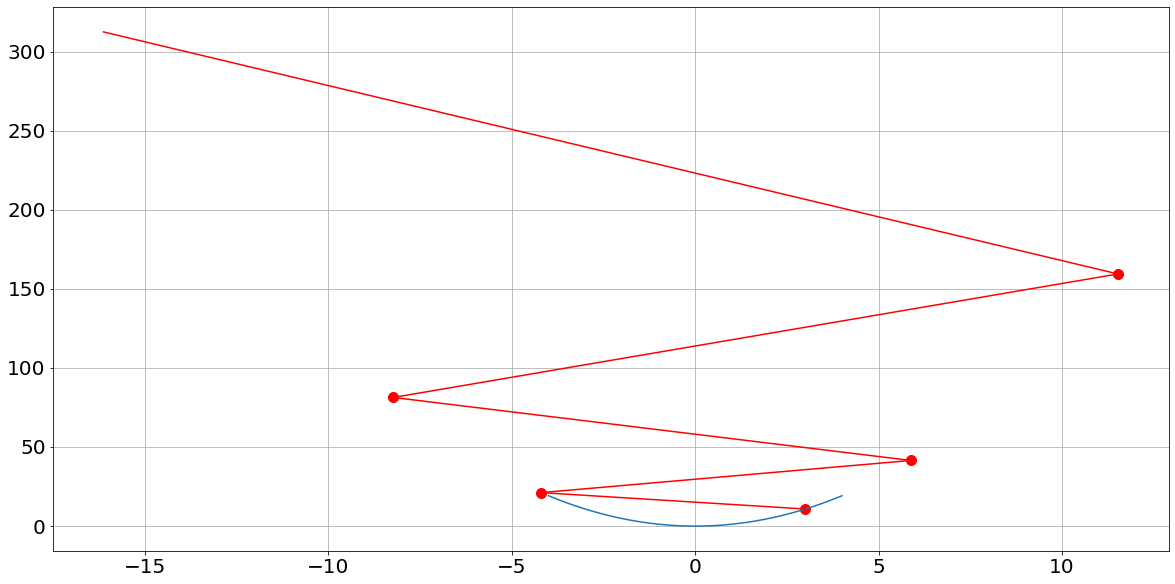

In [16]:
# x, 계수, y를 설정
coeff = 1.2
x = np.linspace(-4, 4, 100)
y = coeff * (x ** 2)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y)

x = 3
for _ in range(5):
    y = coeff * (x ** 2)
    ax.scatter(x, y, c="r", s=100)
    # y값 미분
    diff = 2 * coeff * x
    # 값을 업데이트
    updateX = x - diff
    updateY = coeff * (updateX ** 2)
    # 값 시각화
    ax.plot([x, updateX], [y, updateY], c="r")

    x = updateX

ax.tick_params(labelsize=20)
ax.grid()
plt.show()

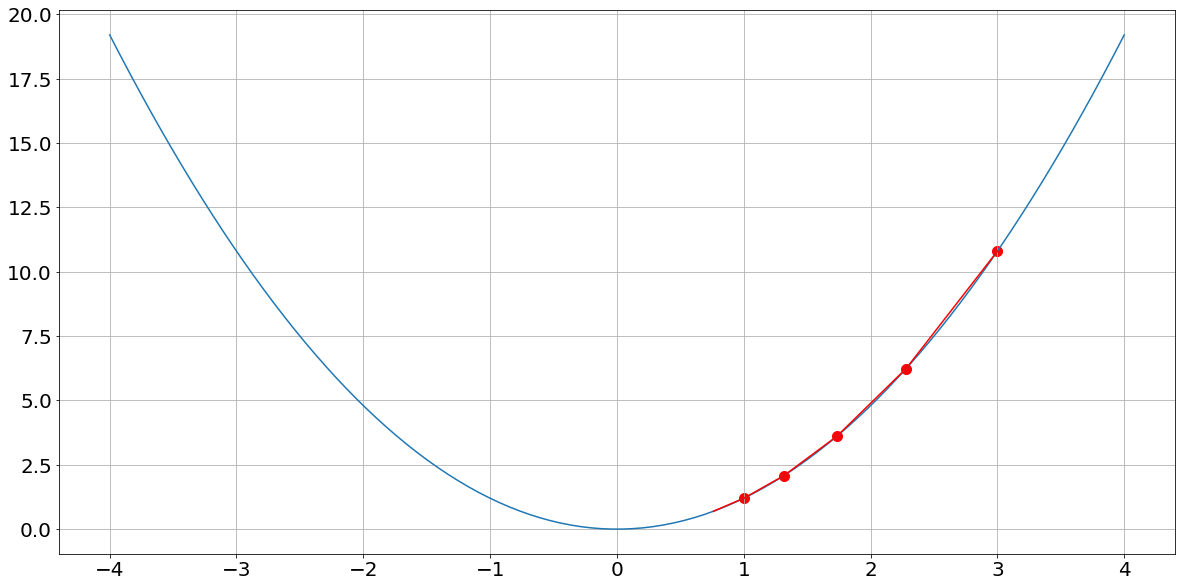

In [17]:
# Learning rate를 추가해서 발산하지 않고 특정한 방향으로만 감소할 수 있도록 조정

# x, 계수, y, lr를 설정
coeff = 1.2
x = np.linspace(-4, 4, 100)
y = coeff * (x ** 2)
lr = 0.1

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y)

x = 3
for _ in range(5):
    y = coeff * (x ** 2)
    ax.scatter(x, y, c="r", s=100)
    # y값 미분
    diff = 2 * coeff * x
    # 값을 업데이트
    updateX = x - diff * lr
    updateY = coeff * (updateX ** 2)
    # 값 시각화
    ax.plot([x, updateX], [y, updateY], c="r")

    x = updateX

ax.tick_params(labelsize=20)
ax.grid()
plt.show()

# 기본적인 딥러닝 모델(fully connected layer)

In [38]:
# 데이터셋 생성
import numpy as np
from numpy.random import normal
from numpy import zeros

from termcolor import colored
import matplotlib.pyplot as plt

plt.style.use("seaborn")

from tensorflow.keras.datasets.mnist import load_data

(imageTrain, labelTrain), testData = load_data()

# 분석을 하기 위한 하이퍼 파라미터 설정
nData = imageTrain.shape[0]
nFeature = imageTrain.shape[1] * imageTrain.shape[2]
batchSize = 64
nBatch = nData // batchSize

epochs = 20
lr = 0.01
units = [64, 32, 10]

In [39]:
# 3개의 레이어를 만들 예정 = 3개의 가중치와 바이어스가 필요
W1 = normal(0, 1, (nFeature, units[0]))
B1 = zeros((units[0]))

W2 = normal(0, 1, (units[0], units[1]))
B2 = zeros((units[1]))

W3 = normal(0, 1, (units[1], units[2]))
B3 = zeros((units[2]))

print(colored("W/B shapes", "green"))
print(f"W1/B1:  {W1.shape}/{B1.shape}")
print(f"W2/B2:  {W2.shape}/{B2.shape}")
print(f"W3/B3:  {W3.shape}/{B3.shape}")

W/B shapes
W1/B1:  (784, 64)/(64,)
W2/B2:  (64, 32)/(32,)
W3/B3:  (32, 10)/(10,)


In [40]:
# forward propagation - 순전파
losses, accs = list(), list()
for epoch in range(epochs):
    n_correct, nData = 0, 0
    for b_idx in range(nBatch):
        # 미니배치 가져오기
        images = imageTrain[b_idx * batchSize : (b_idx + 1) * batchSize, ...]
        X = images.reshape(batchSize, -1) / 255.0
        Y = labelTrain[b_idx * batchSize : (b_idx + 1) * batchSize]

        # foward propagation
        # layer 1
        Z1 = X @ W1 + B1
        A1 = 1 / (1 + np.exp(-Z1))  # sigmoid
        # layer 2
        Z2 = A1 @ W2 + B2
        A2 = 1 / (1 + np.exp(-Z2))  # sigmoid
        # layer 3
        L = A2 @ W3 + B3
        Pred = np.exp(L) / np.sum(np.exp(L), axis=1, keepdims=True)
        # loss
        J = np.mean(-np.log(Pred[np.arange(batchSize), Y]))
        losses.append(J)
        # acc check
        PredLabel = np.argmax(Pred, axis=1)
        n_correct += np.sum(PredLabel == Y)
        nData += batchSize

        ###  back propagation
        labels = Y.copy()
        Y = np.zeros_like(Pred)
        Y[np.arange(batchSize), labels] = 1

        # loss derivative and layer3
        dL = -1 / batchSize * (Y - Pred)
        dA2 = dL @ W3.T
        dW3 = A2.T @ dL
        dB3 = np.sum(dL, axis=0)
        # layer2
        dZ2 = dA2 * A2 * (1 - A2)
        dA1 = dZ2 @ W2.T
        dW2 = A1.T @ dZ2
        dB2 = np.sum(dZ2, axis=0)
        # layer1
        dZ1 = dA1 * A1 * (1 - A1)
        dW1 = X.T @ dZ1
        dB1 = np.sum(dZ1, axis=0)

        # parameter update / updateX = w - diff * lr
        W3, B3 = W3 - lr * dW3, B3 - lr * dB3
        W2, B2 = W2 - lr * dW2, B2 - lr * dB2
        W1, B1 = W1 - lr * dW1, B1 - lr * dB1
    accs.append(n_correct / nData)

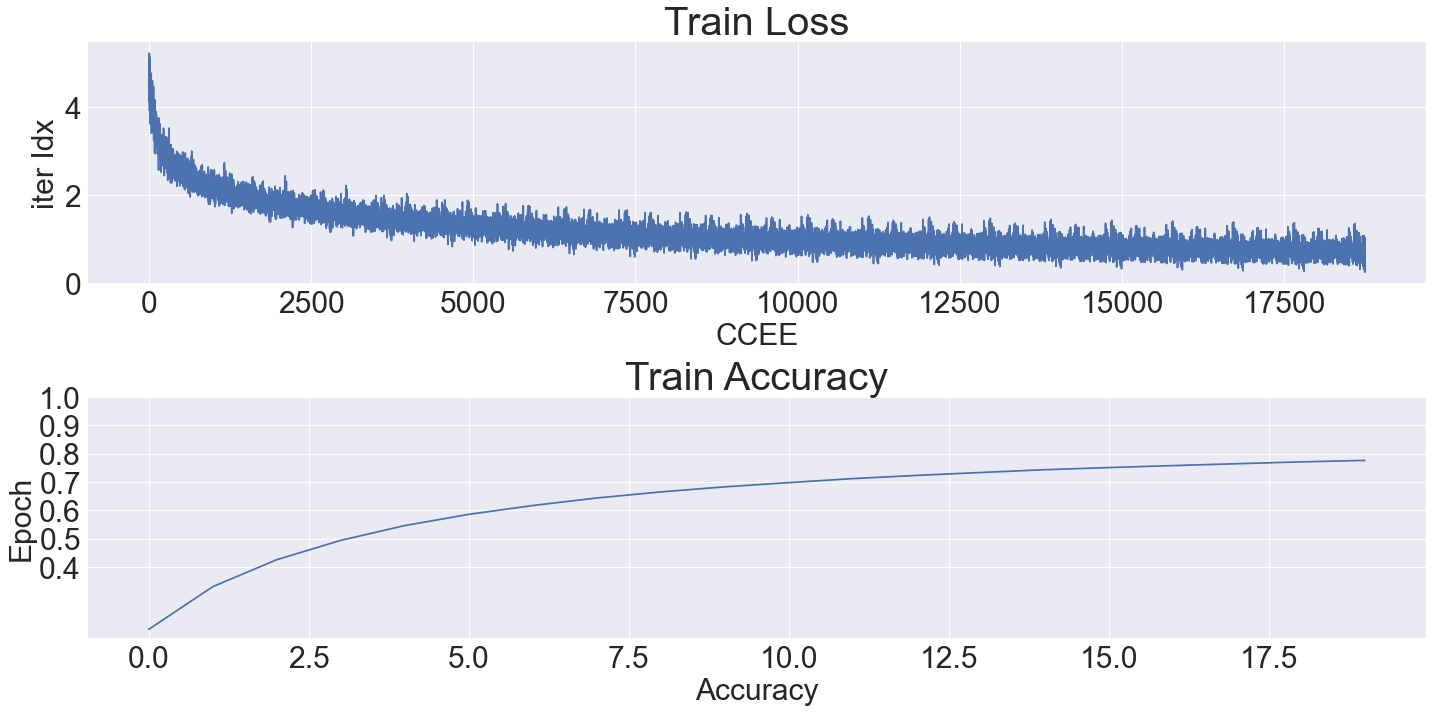

In [49]:
#시각화 visialization
fig, axes = plt.subplots(2,1, figsize = (20,10))
axes[0].plot(losses)
axes[1].plot(accs)

axes[0].set_title('Train Loss', fontsize = 40)
axes[0].set_ylabel('iter Idx', fontsize = 30)
axes[0].set_xlabel('CCEE', fontsize = 30)

axes[1].set_title('Train Accuracy', fontsize = 40)
axes[1].set_ylabel('Epoch', fontsize = 30)
axes[1].set_xlabel('Accuracy', fontsize = 30)

axes[1].set_yticks(np.linspace(0.4,1.0,7))

axes[0].tick_params(labelsize = 30)
axes[1].tick_params(labelsize = 30)
fig.tight_layout()
plt.show()

In [56]:
print(np.mean(accs[-5:-1]))
print(np.mean(losses[-5:-1]))

0.7610475586979724
0.5931504058488579
